# Exploration et analyse des données 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

In [2]:
# Ensemble pour tracker les insights écrits
written_insights = set()


# Unités du glossaire
units = {
    'PopTotal': 'Milliers d’habitants',
    'PopDensity': 'Habitants par km²',
    'PopSexRatio': 'Hommes/100 femmes',
    'MedianAgePop': 'Années',
    'CBR': 'Naissances pour 1000 habitants',
    'TFR': 'Enfants par femme',
    'LEx': 'Années',
    'IMR': 'Décès pour 1000 naissances vivantes',
    'Q5': 'Décès pour 1000 naissances vivantes',
    'NetMigrations': 'Milliers de personnes',
    'hdi': 'Sans unité (0 à 1)',
    'mys': 'Années',
    'gdi': 'Sans unité (0 à 1)',
    'gnipc': 'USD (PPP)',
    'gii': 'Sans unité (0 à 1)',
    'FDI_Current': 'Millions USD',
    'FDI_Percentage': 'Pourcentage (%)',
    'GDP_Current': 'Millions USD',
    'GDP_Current_PerCapita': 'USD par personne',
    'GDP_Constant': 'Millions USD',
    'GDP_Constant_PerCapita': 'USD par personne'
}

# Variables nécessitant axes secondaires
dual_axis_features = ['PopTotal', 'NetMigrations', 'FDI_Current', 'FDI_Percentage', 'GDP_Constant', 'GDP_Current']



# Créer dossier pour graphiques
os.makedirs('graphs', exist_ok=True)

# Fichier pour stocker les insights
insights_file = 'insights.md'
with open(insights_file, 'w', encoding='utf-8') as f:
    f.write("# Insights pour ANIP\n\n")
    f.write("## Glossaire des variables dérivées\n")
    f.write("| Variable | Description | Unité |\n")
    f.write("|----------|-------------|-------|\n")
    f.write("| Net_FDI | Investissements étrangers nets (entrants - sortants) | Millions USD |\n")
    f.write("| FDI_Per_Person | Investissements étrangers par habitant | USD par personne |\n")
    f.write("| GDP_Per_Density | PIB par habitant ajusté à la densité | USD par personne par km² |\n")
    f.write("| HDI_Per_TFR | HDI ajusté au taux de fécondité | Sans unité (0 à 1) par enfant/femme |\n")
    f.write("| LEx_et_GDP_Constant_PerCapita | Espérance de vie par rapport au PIB par habitant | Années par USD par personne |\n")
    f.write("| PopSexRatio_et_GDI | Ratio de masculinité par rapport à l’indice de développement par genre | Hommes/100 femmes par unité (0 à 1) |\n")
    f.write("| GII_et_IMR | Inégalités de genre par rapport à la mortalité infantile | Sans unité (0 à 1) par décès/1000 naissances |\n\n")

# Insights simplifiés pour le grand public
insights = {
    'PopTotal': 'La population augmente au Bénin et en Afrique de l’Ouest.',
    'PopDensity': 'Le taux d’urbanisation est en constante augmentation et dépasse celui de la moyenne régionale.',
    'PopSexRatio': 'L’équilibre entre hommes et femmes s’améliore nettement mais reste plus déséquilibré que dans la sous-région.',
    'MedianAgePop': 'La population est très jeune dans le pays et la sous-région.',
    'CBR': 'Il y a une diminution progressive des naissances dans le pays et la sous-région.',
    'TFR': 'Le taux de fécondité baisse progressivement.',
    'LEx': 'L’espérance de vie au Bénin et dans la sous-région s’est nettement accrue.',
    'IMR': 'Moins d’enfants meurent en bas âge.',
    'Q5': 'Il y a une meilleure espérance de vie pour les enfants de moins de 05 ans.',
    'NetMigrations': 'Il y a plus de personnes qui quittent le pays que l’inverse, et ce solde migratoire négatif reste stable depuis de nombreuses années.',
    'hdi': 'Le développement humain s’améliore lentement, ce qui montre un pays qui avance pour le bien-être de tous.',
    'mys': 'Les années d’école augmentent peu à peu.',
    'gdi': 'L’égalité entre hommes et femmes grandit.',
    'gnipc': 'Le revenu par personne augmente doucement, mais l’économie est instable, impactant le quotidien des gens.',
    'gii': 'Les inégalités de genre diminuent dans le pays.',
    'FDI_Current': 'Les investissements étrangers fluctuent, mais montrent un intérêt croissant pour la région.',
    'FDI_Percentage': 'La part du pays dans les investissements mondiaux varie, reflétant une visibilité internationale en évolution.',
    'GDP_Current': 'L’économie grandit au fil du temps mais reste instable.',
    'GDP_Current_PerCapita': 'Le revenu par personne s’améliore mais de façon instable.',
    'GDP_Constant': 'La production réelle du pays augmente, signe d’un progrès stable.',
    'GDP_Constant_PerCapita': 'Chacun bénéficie un peu plus de la richesse du pays.',
    'Net_FDI': 'Les investissements nets varient, montrant un potentiel économique en évolution.',
    'FDI_Per_Person': 'Les investissements directs étrangers ajustés par personne s’accroissent.',
    'GDP_Per_Density': 'Il y a une augmentation de la richesse par personne ajustée à la densité de la population.',
    'HDI_Per_TFR': 'La diminution du taux de fécondité améliore le bien-être personnel.',
    'LEx_et_GDP_Constant_PerCapita': 'L’augmentation de la richesse personnelle provoque une augmentation de l’espérance de vie.',
    'PopSexRatio_et_GDI': 'L’équilibre entre hommes et femmes s’améliore, créant plus d’égalité.',
    'GII_et_IMR': 'La diminution des inégalités de genre entraîne la baisse de la mortalité infantile.'
}



def plot_single_axis(df, feature, title, ylabel, save_path=None):
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df, x='Year', y=feature, hue='Country', marker='o')
    if df[feature].max() / (df[feature].min() + 1e-6) > 100 and df[feature].min() > 0:
        plt.yscale('log')
        ylabel += ' (échelle logarithmique)'
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel(ylabel)
    plt.legend(title='Géographie')
    plt.grid(True)
    plt.savefig(save_path)
    plt.show()
    # Écrire l'insight uniquement si pas déjà écrit
    if feature in insights and feature not in written_insights:
        with open(insights_file, 'a', encoding='utf-8') as f:
            f.write(f"### Insight pour {feature}\n")
            f.write(f"{insights.get(feature, 'La valeur évolue au Bénin et dans la région.')}\n\n")
        written_insights.add(feature)


# Fonction pour axes secondaires 
def plot_dual_axis(df, feature, title, ylabel, countries=['Benin', 'Western Africa'], save_path=None):
    df_pivot = df.pivot(index='Year', columns='Country', values=feature).reset_index()
    countries = [c for c in countries if c in df_pivot.columns]
    if len(countries) < 1:
        print(f"Aucun pays valide pour {feature}")
        return
    
    fig, ax1 = plt.subplots(figsize=(10, 6))
    color1 = 'orange'
    ax1.set_xlabel('Year')
    ax1.set_ylabel(f'{countries[0]} {ylabel}', color=color1)
    ax1.plot(df_pivot['Year'], df_pivot[countries[0]], color=color1, label=countries[0])
    ax1.tick_params(axis='y', labelcolor=color1)
    
    if len(countries) > 1:
        color2 = 'blue'
        ax2 = ax1.twinx()
        ax2.set_ylabel(f'{countries[1]} {ylabel}', color=color2)
        ax2.plot(df_pivot['Year'], df_pivot[countries[1]], color=color2, label=countries[1])
        ax2.tick_params(axis='y', labelcolor=color2)
        if df_pivot[countries[0]].max() / (df_pivot[countries[0]].min() + 1e-6) > 100 and df_pivot[countries[0]].min() > 0:
            ax1.set_yscale('log')
        if df_pivot[countries[1]].max() / (df_pivot[countries[1]].min() + 1e-6) > 100 and df_pivot[countries[1]].min() > 0:
            ax2.set_yscale('log')
        lines1, labels1 = ax1.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax1.legend(lines1 + lines2, labels1 + labels2, title='Géographie')
    
    plt.title(title)
    fig.tight_layout()
    plt.savefig(save_path)
    plt.show()
    # Écrire l'insight uniquement si pas déjà écrit
    if feature in insights and feature not in written_insights:
        with open(insights_file, 'a', encoding='utf-8') as f:
            f.write(f"### Insight pour {feature}\n")
            f.write(f"{insights.get(feature, 'La valeur évolue au Bénin et dans la région.')}\n\n")
        written_insights.add(feature)

# Données démographiques

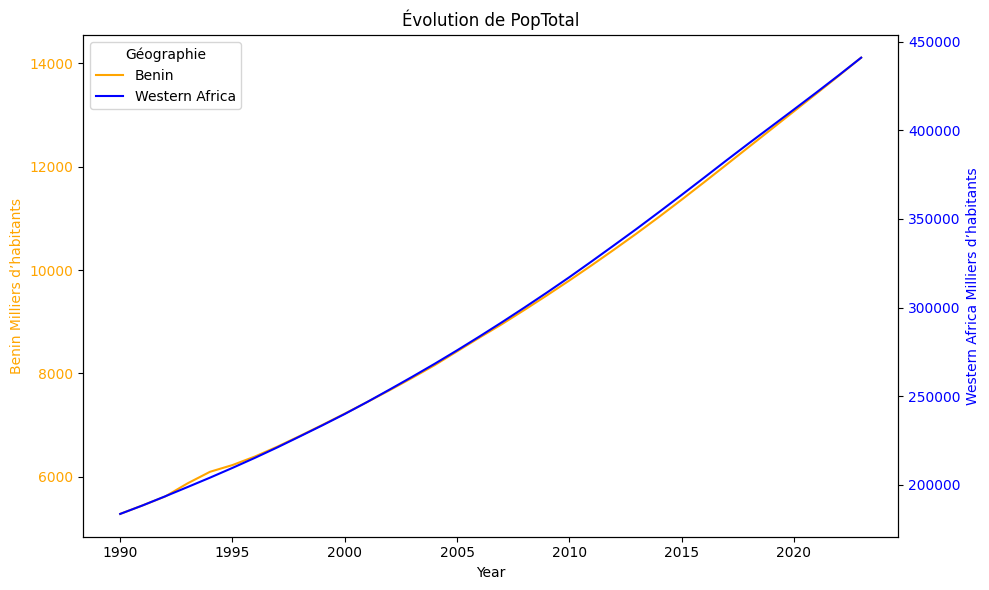

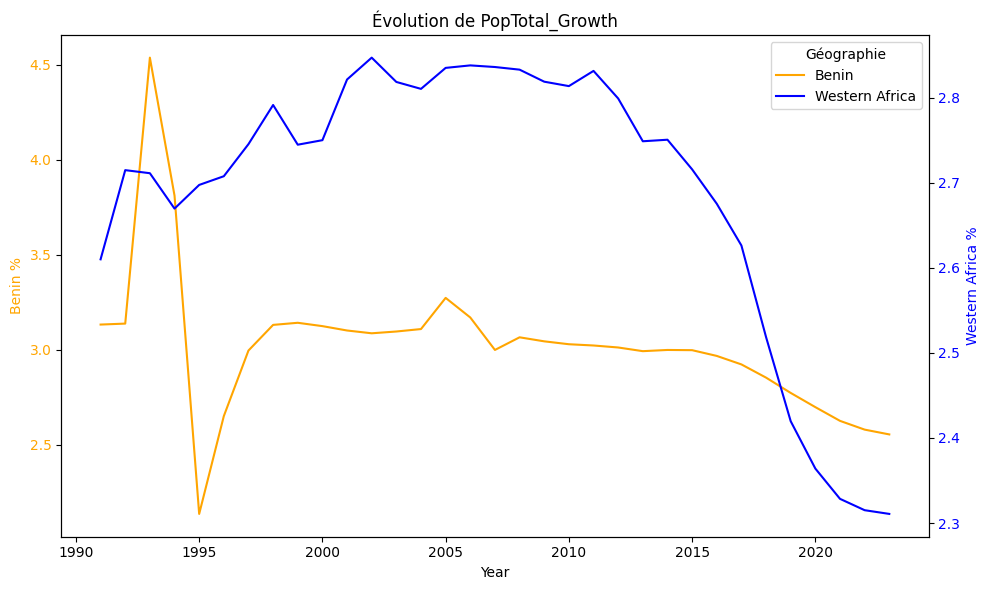

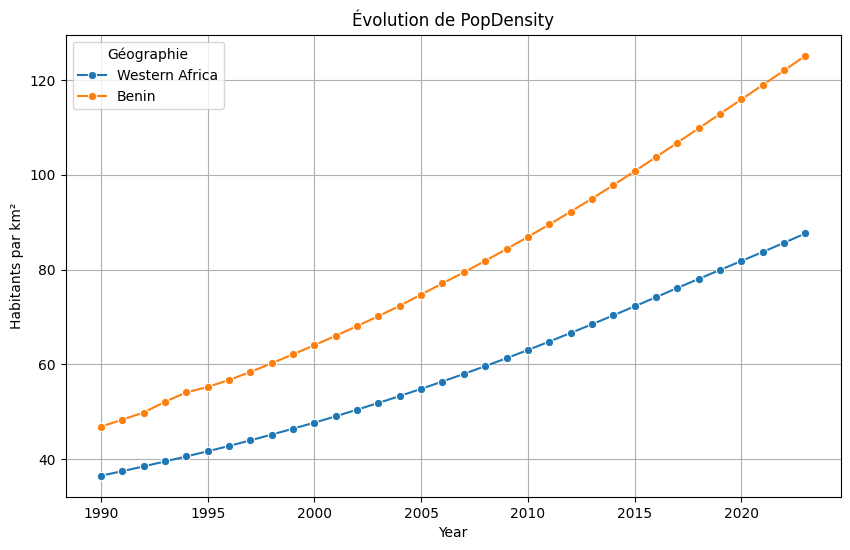

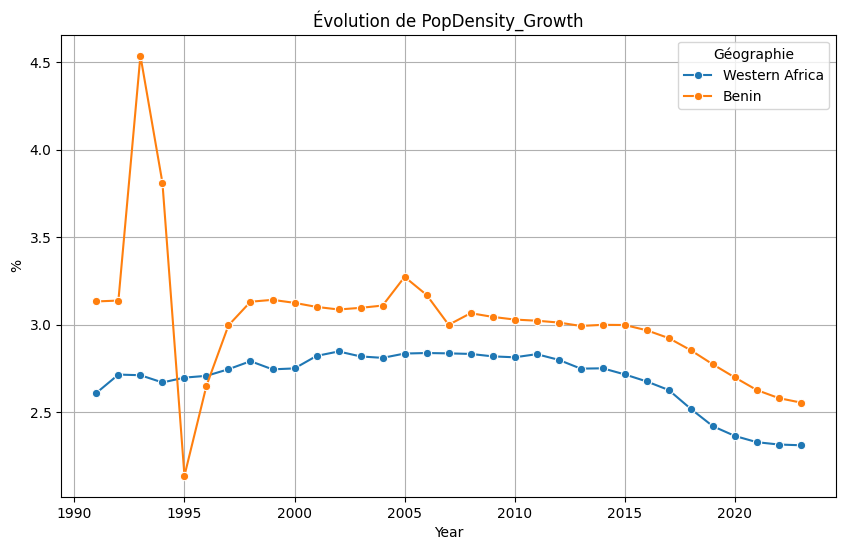

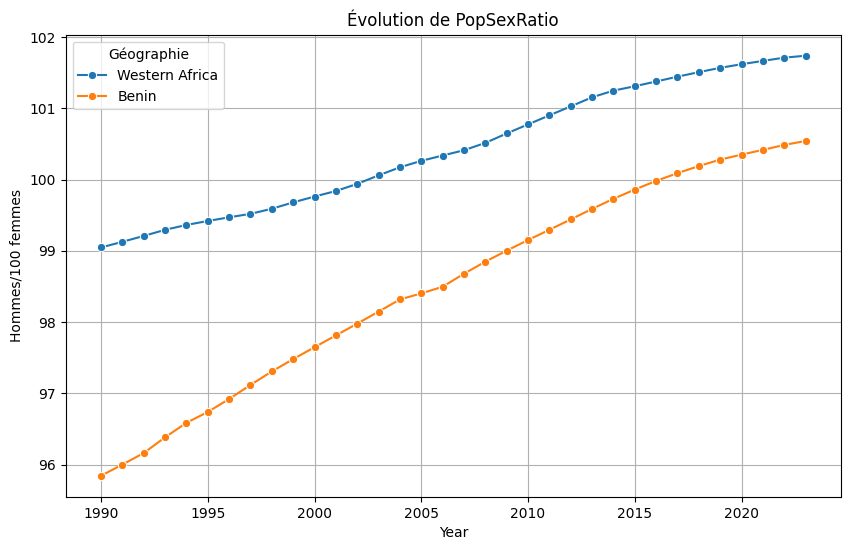

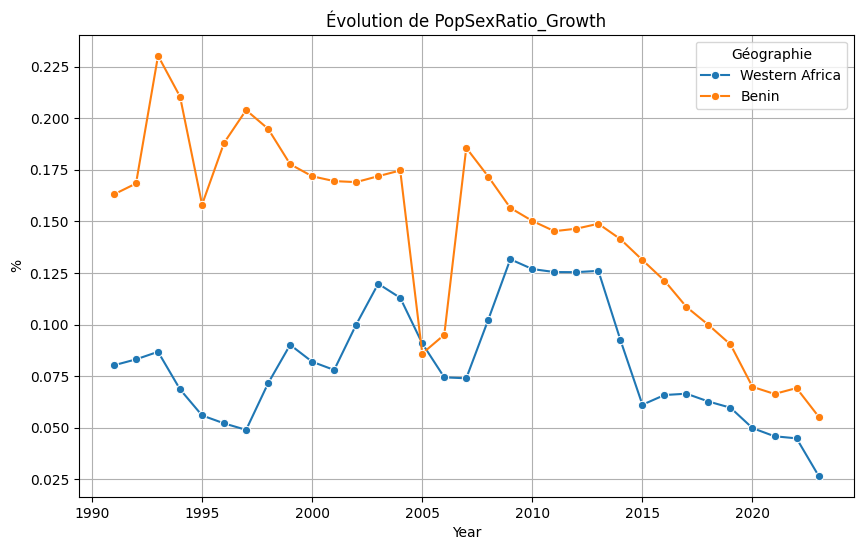

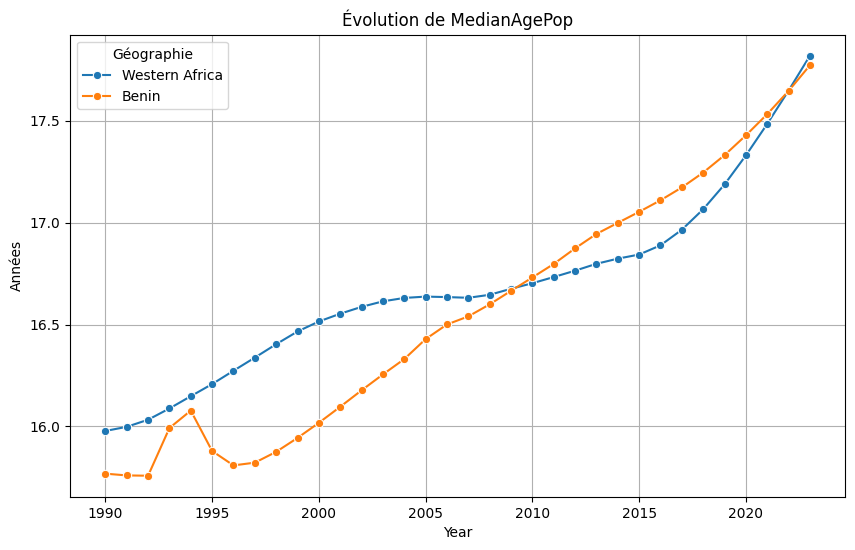

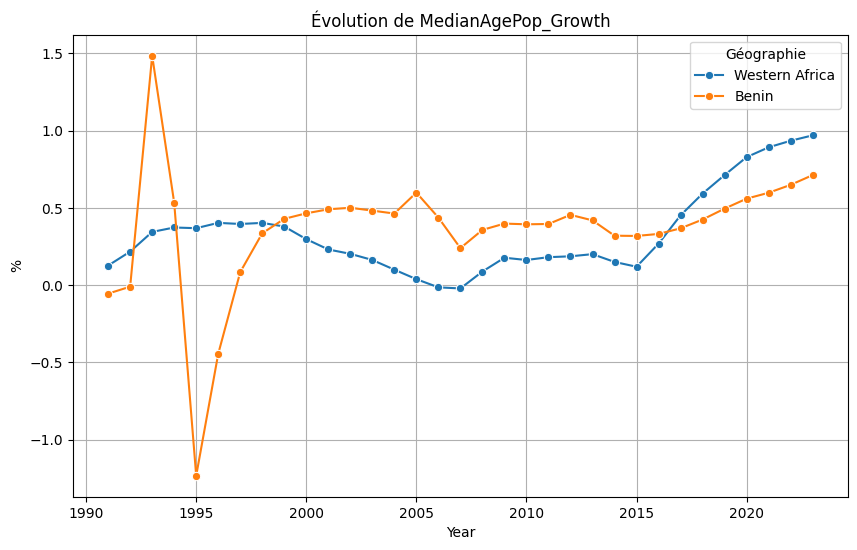

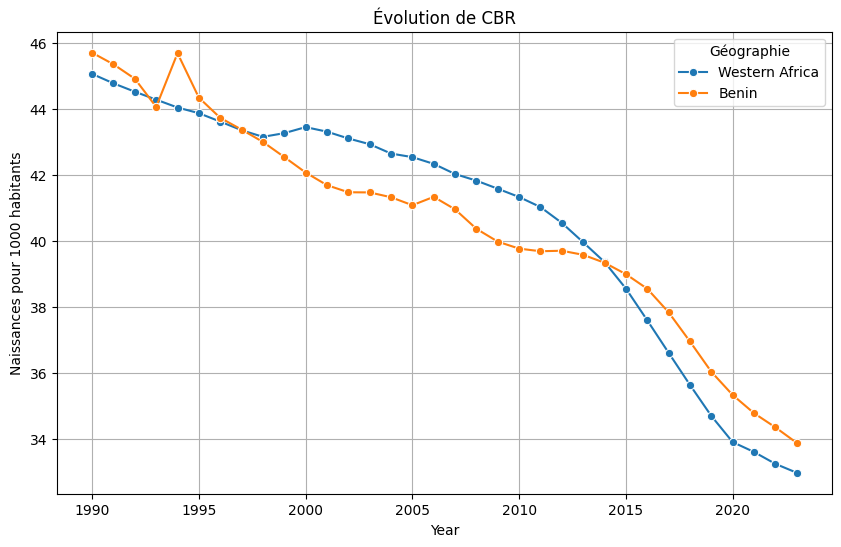

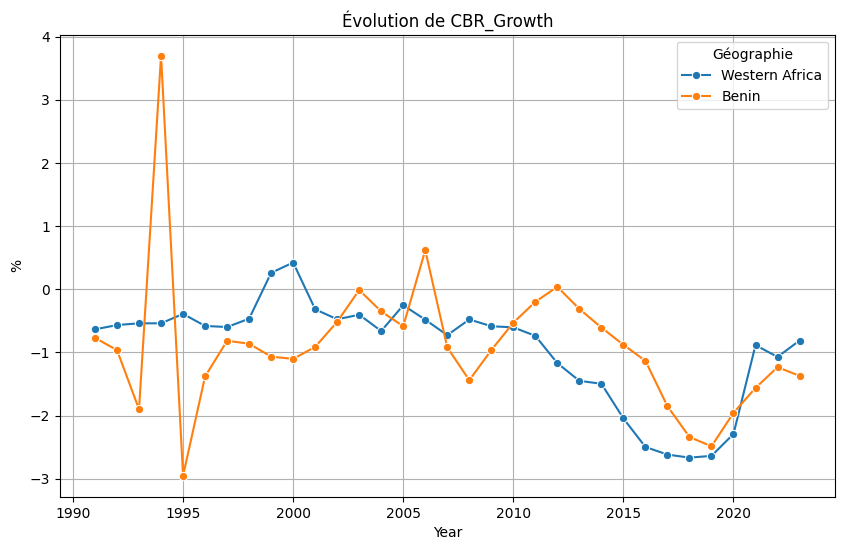

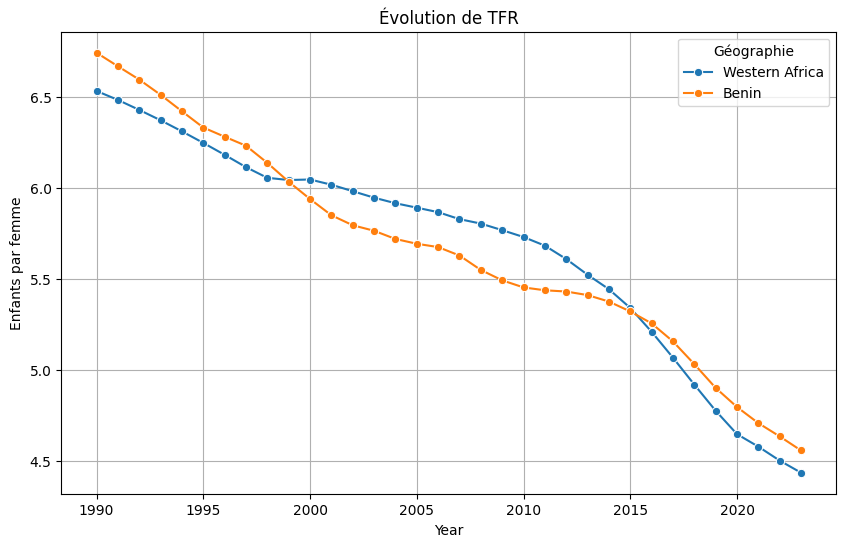

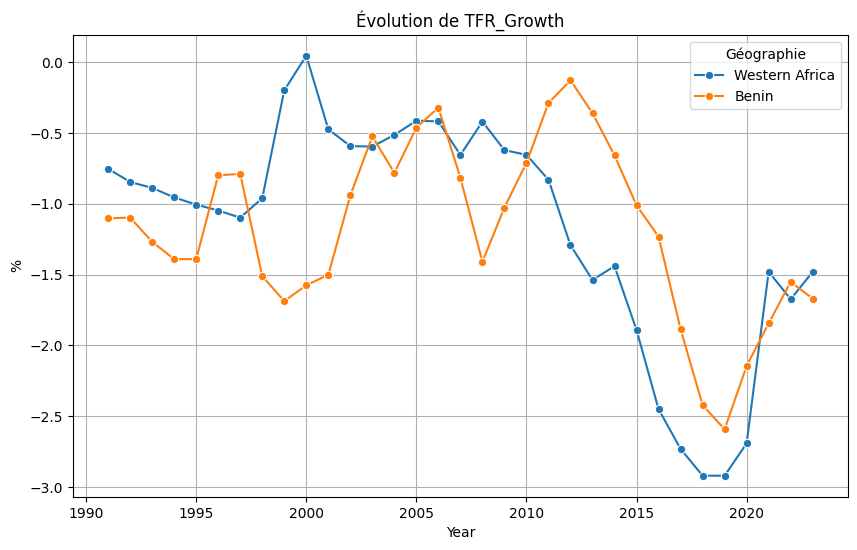

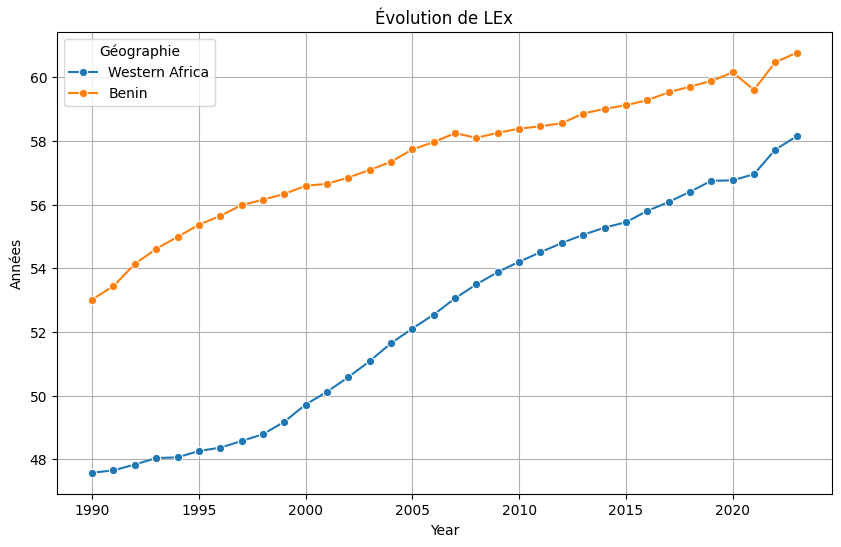

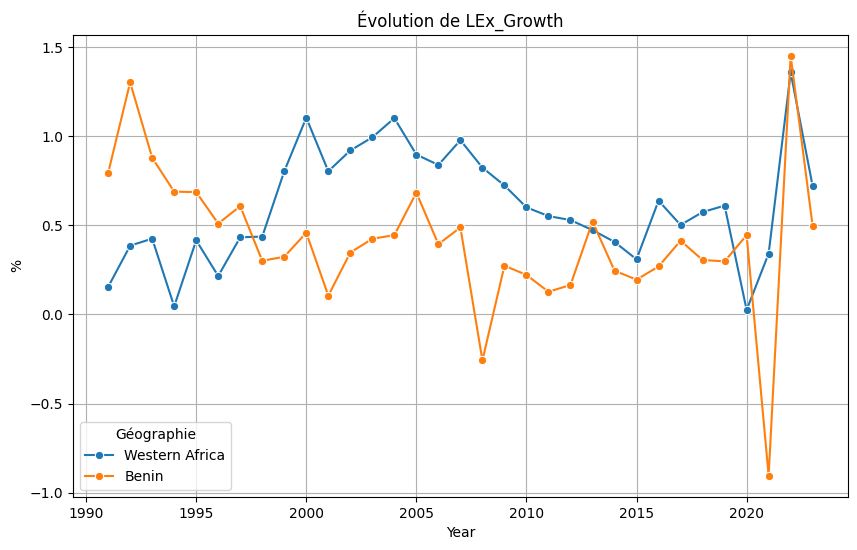

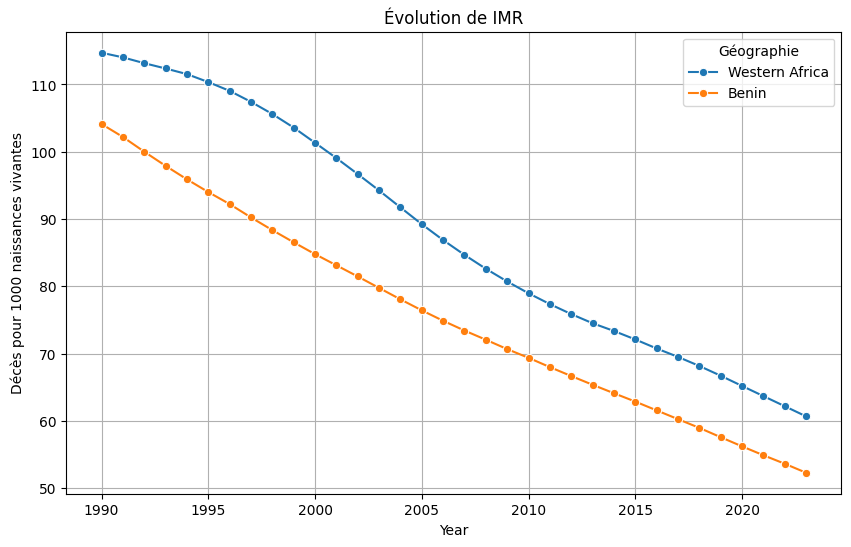

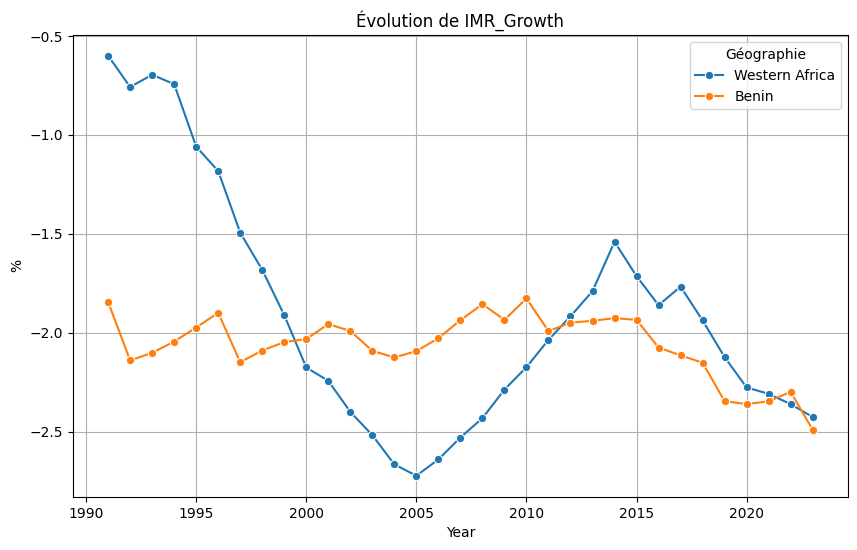

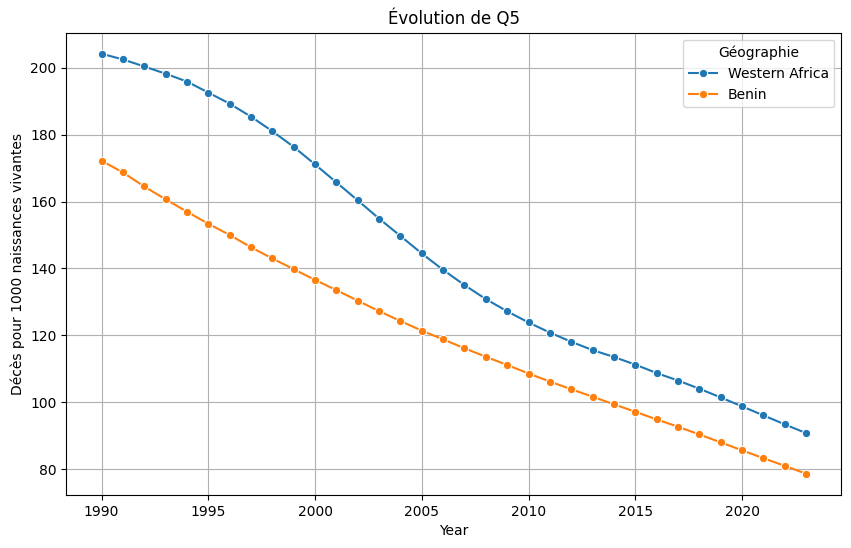

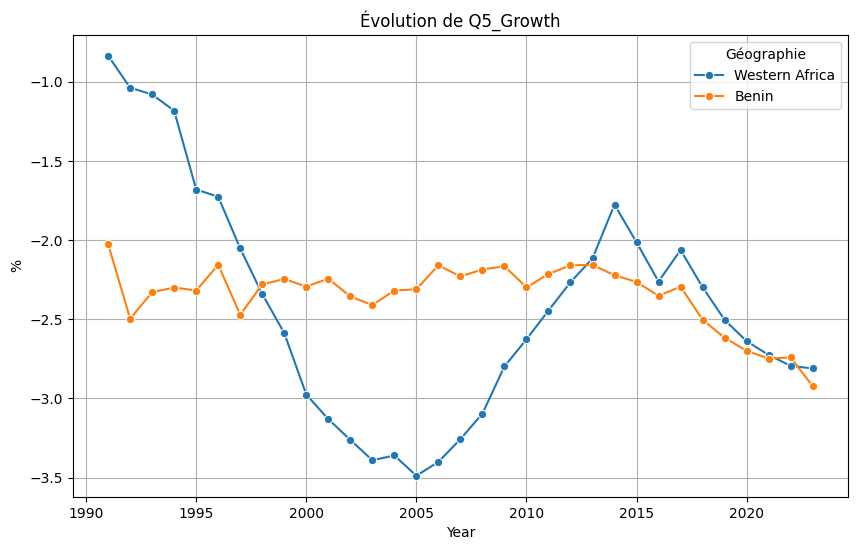

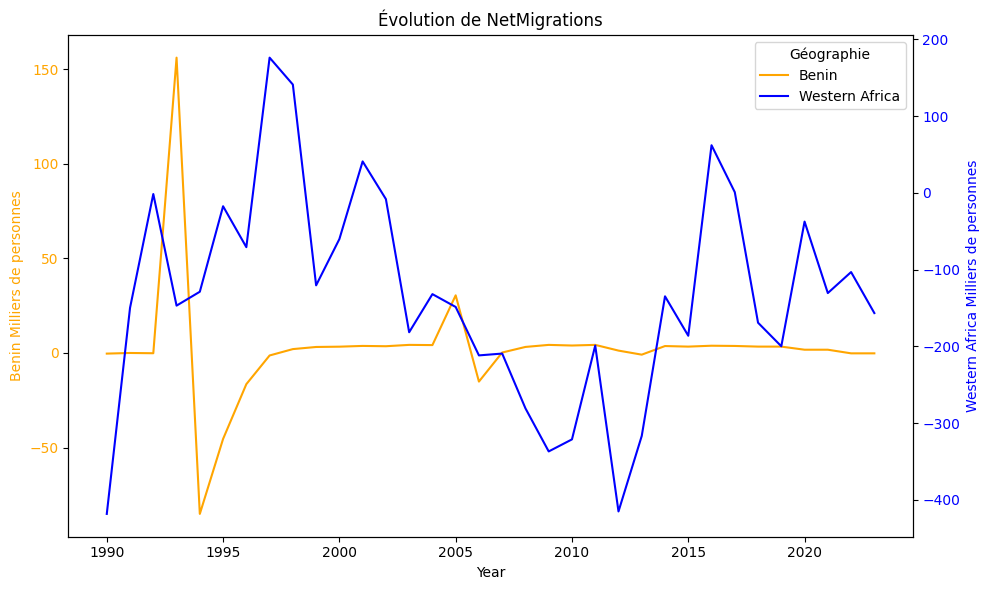

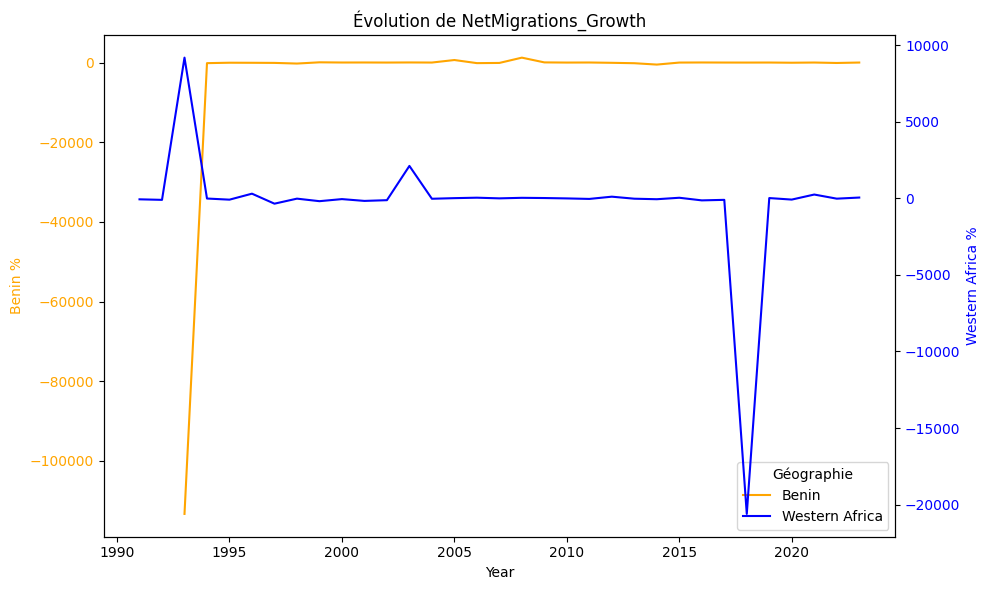

In [3]:
# 1. Démographie
try:
    demo_df = pd.read_csv('demographic_data.csv').rename(columns={'Location': 'Country'})
    demo_df['Country'] = demo_df['Country'].replace('African Union: Western Africa', 'Western Africa')
    demo_df = demo_df[demo_df['Year'].between(1990, 2023)]
    
    for feature in ['PopTotal', 'PopDensity', 'PopSexRatio', 'MedianAgePop', 'CBR', 'TFR', 'LEx', 'IMR', 'Q5', 'NetMigrations']:
        if feature in demo_df.columns:
            demo_df[f'{feature}_Growth'] = demo_df.groupby('Country')[feature].pct_change() * 100
            if feature in dual_axis_features:
                plot_dual_axis(
                    demo_df, feature, f'Évolution de {feature}', units.get(feature, feature),
                    save_path=f'graphs/demo_{feature}.png'
                )
                plot_dual_axis(
                    demo_df, f'{feature}_Growth', f'Évolution de {feature}_Growth', '%',
                    save_path=f'graphs/demo_{feature}_Growth.png'
                )
            else:
                plot_single_axis(
                    demo_df, feature, f'Évolution de {feature}', units.get(feature, feature),
                    save_path=f'graphs/demo_{feature}.png'
                )
                plot_single_axis(
                    demo_df, f'{feature}_Growth', f'Évolution de {feature}_Growth', '%',
                    save_path=f'graphs/demo_{feature}_Growth.png'
                )
    del demo_df
except Exception as e:
    print(f"Erreur démographie : {str(e)}")

    

# Données sociales 

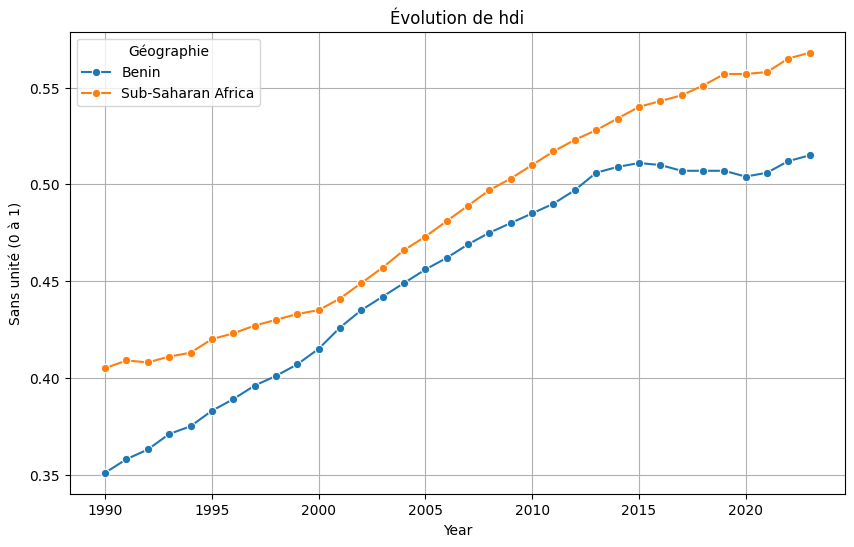

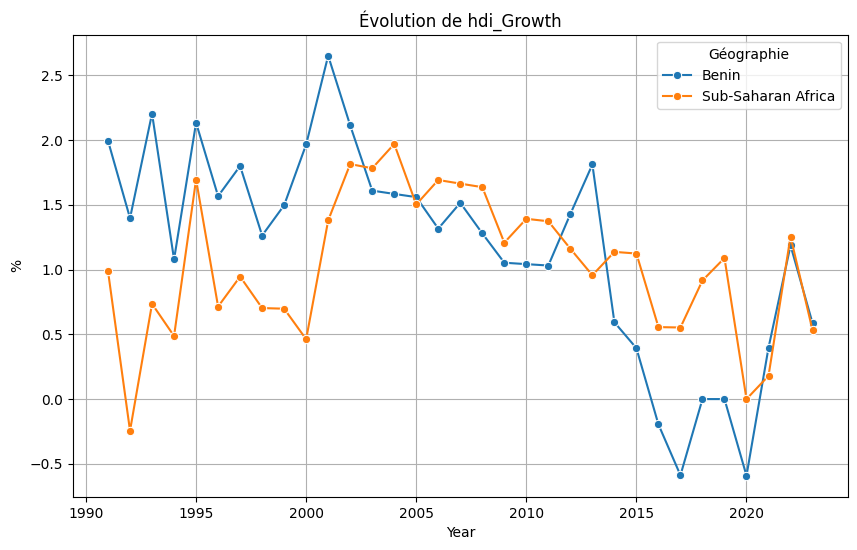

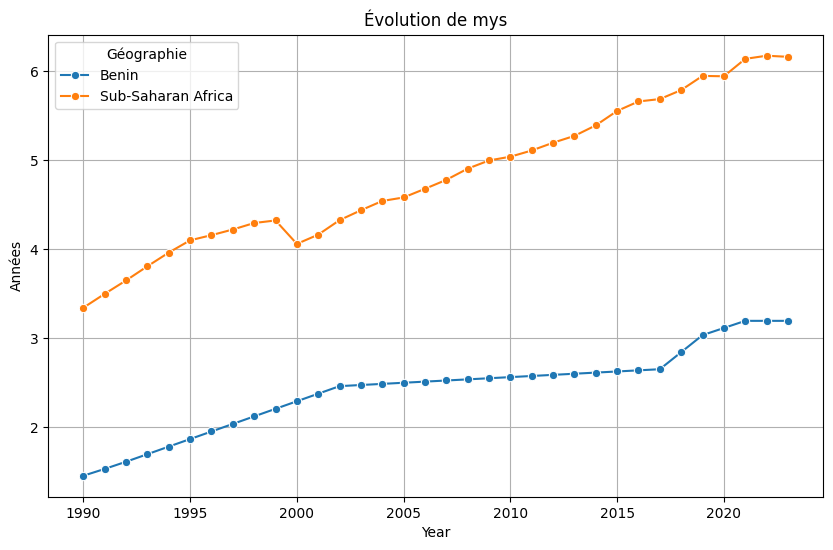

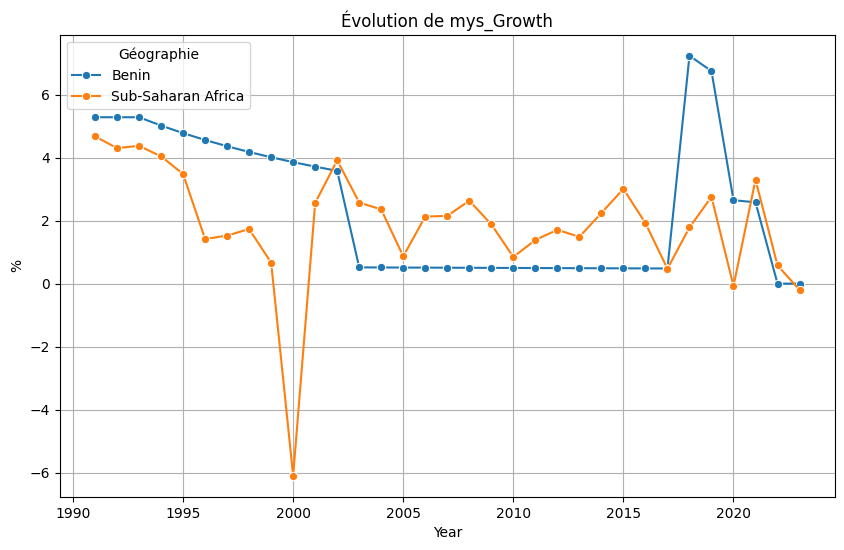

C:\Users\afagn\AppData\Local\Temp\ipykernel_16440\2765346096.py:23: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  social_long[f'{feature}_Growth'] = social_long.groupby('Country')[feature].pct_change() * 100


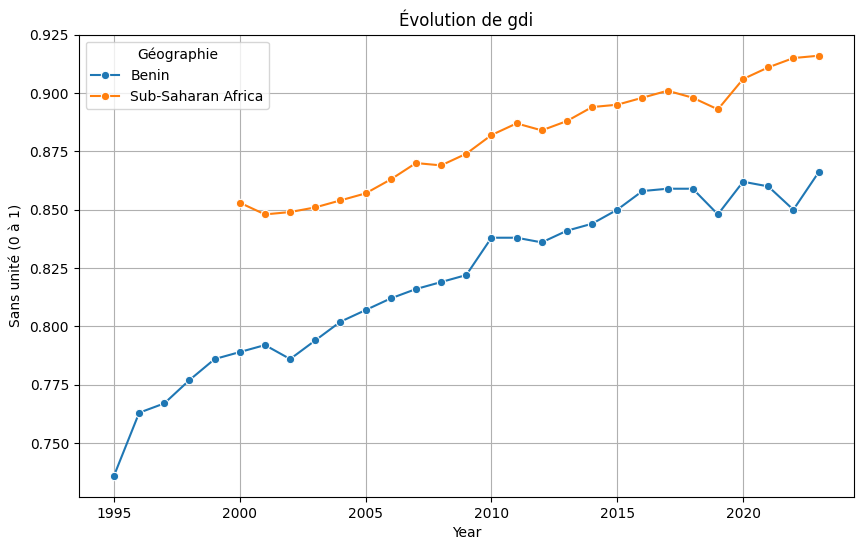

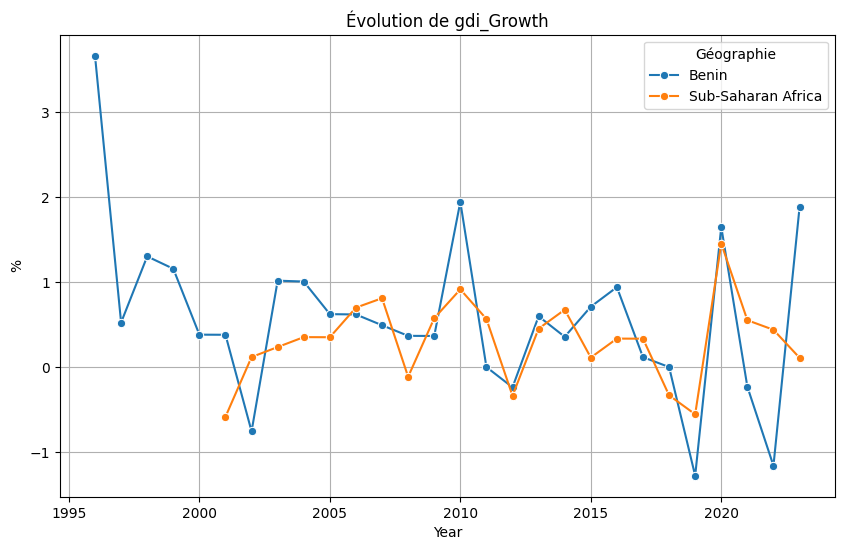

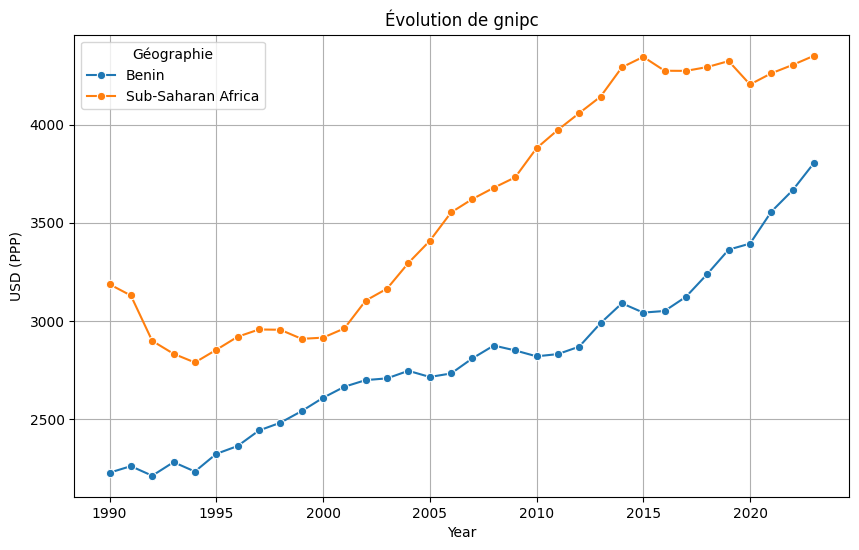

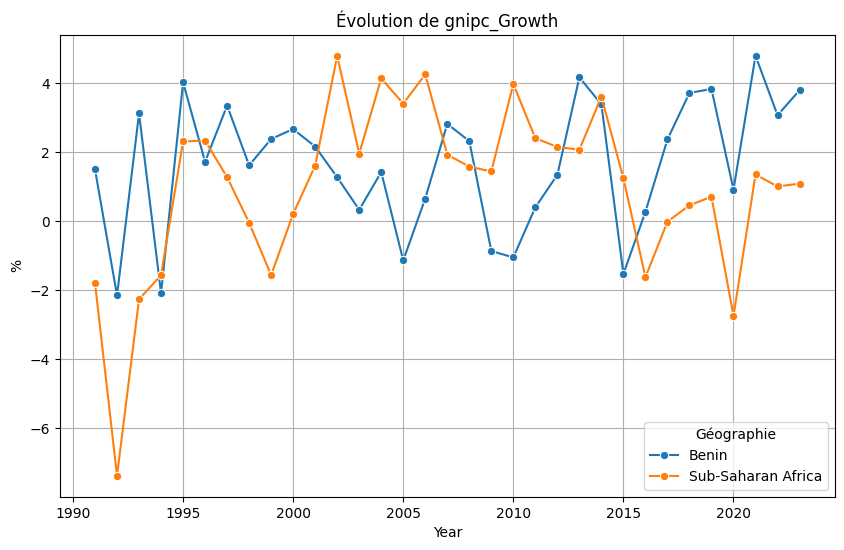

C:\Users\afagn\AppData\Local\Temp\ipykernel_16440\2765346096.py:23: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  social_long[f'{feature}_Growth'] = social_long.groupby('Country')[feature].pct_change() * 100


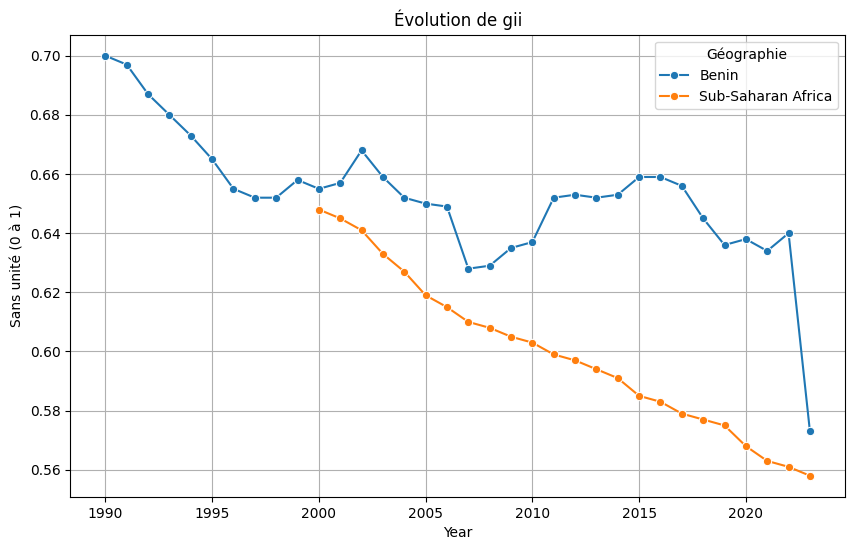

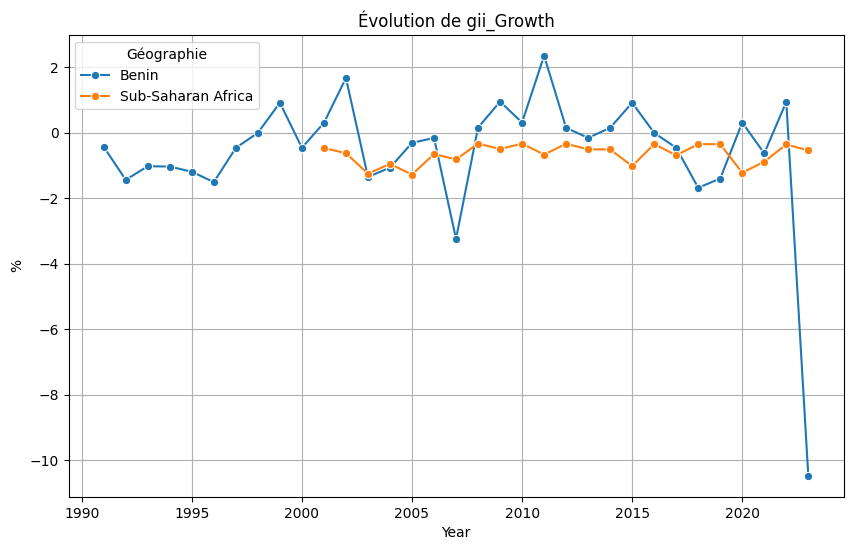

In [4]:
# 2. Social
try:
    social_df = pd.read_csv('social_data.csv').rename(columns={'country': 'Country'})
    indicators = ['hdi', 'mys', 'gdi', 'gnipc', 'gii']
    melted_dfs = []
    for ind in indicators:
        cols = ['Country'] + [col for col in social_df.columns if col.startswith(ind + '_')]
        if not cols[1:]:
            continue
        df_ind = social_df[cols].melt(id_vars=['Country'], var_name='Year', value_name=ind)
        df_ind['Year'] = df_ind['Year'].str.extract('(\d+)').astype(float)
        df_ind = df_ind.dropna(subset=[ind])
        melted_dfs.append(df_ind)
    
    social_long = melted_dfs[0]
    for df in melted_dfs[1:]:
        social_long = pd.merge(social_long, df, on=['Country', 'Year'], how='outer')
    
    social_long = social_long[social_long['Year'].between(1990, 2023)]
    
    for feature in indicators:
        if feature in social_long.columns:
            social_long[f'{feature}_Growth'] = social_long.groupby('Country')[feature].pct_change() * 100
            plot_single_axis(
                social_long, feature, f'Évolution de {feature}', units.get(feature, feature),
                save_path=f'graphs/social_{feature}.png'
            )
            plot_single_axis(
                social_long, f'{feature}_Growth', f'Évolution de {feature}_Growth', '%',
                save_path=f'graphs/social_{feature}_Growth.png'
            )
    del social_long
except Exception as e:
    print(f"Erreur social : {str(e)}")

# Données économiques

Erreur FDI : Index contains duplicate entries, cannot reshape


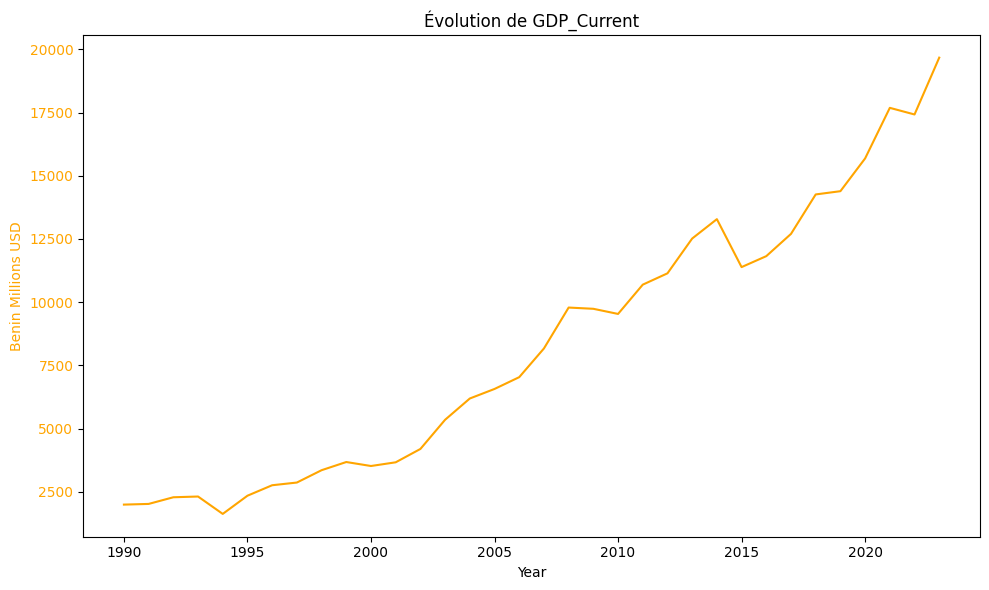

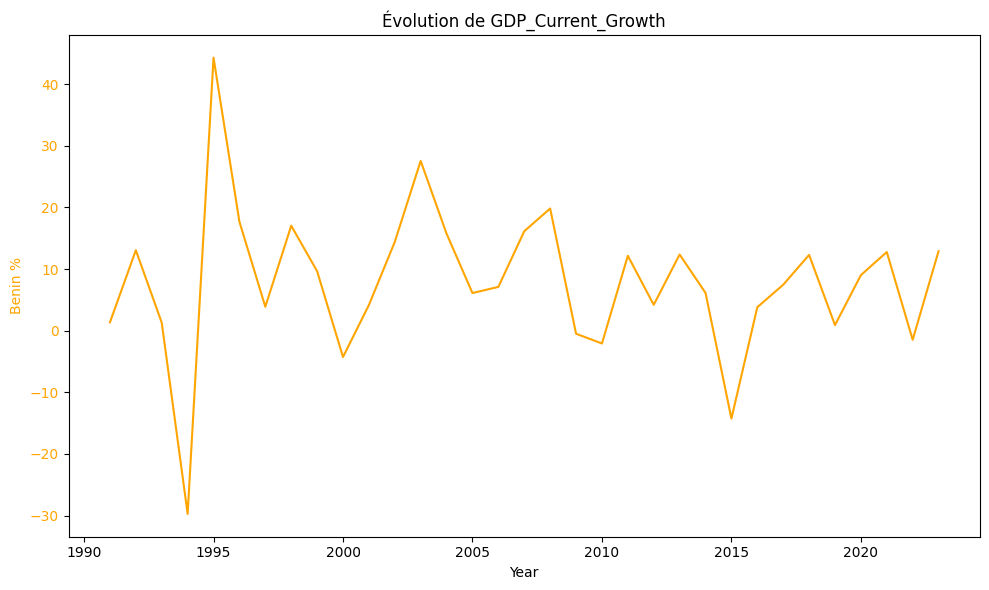

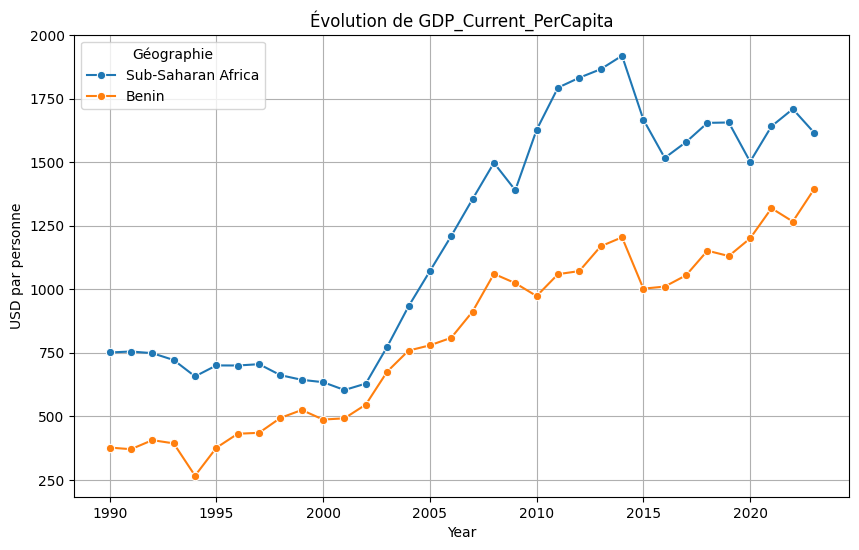

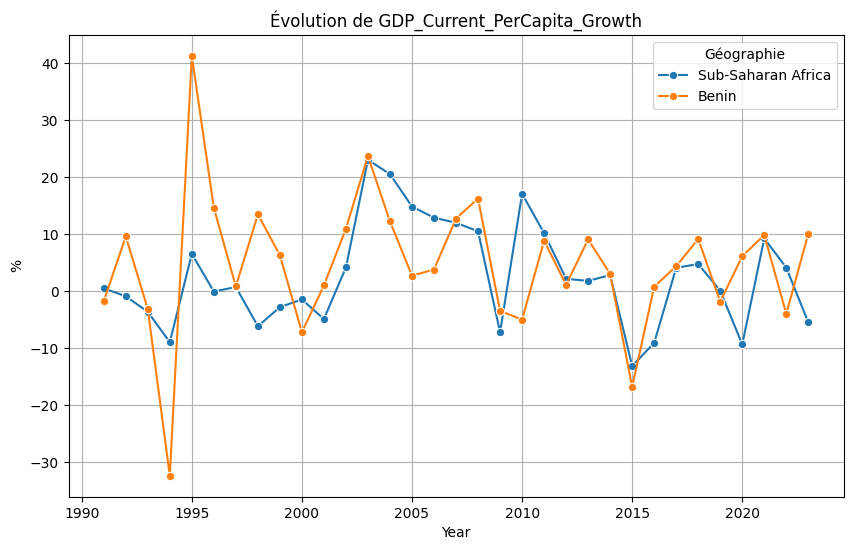

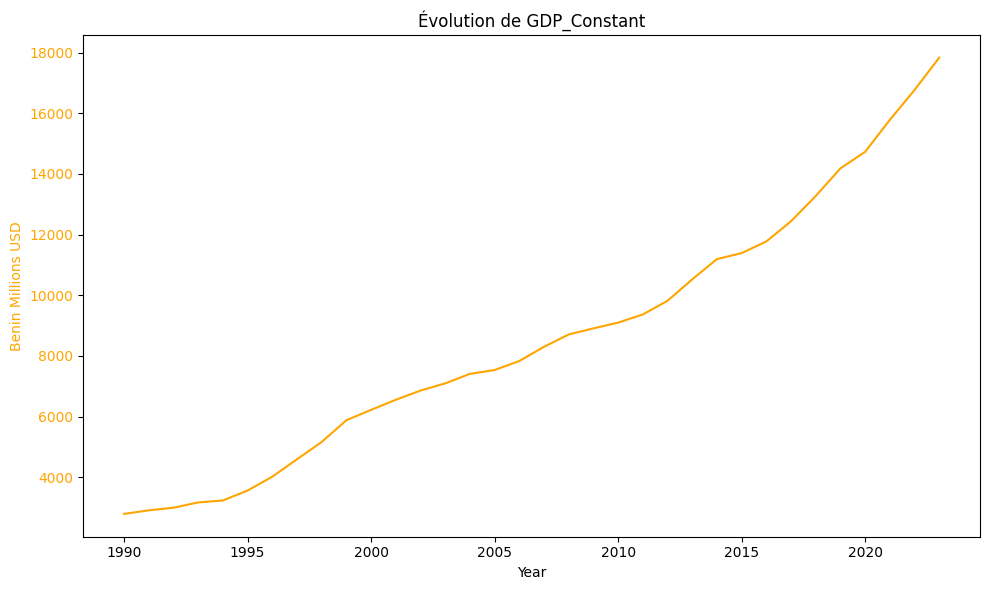

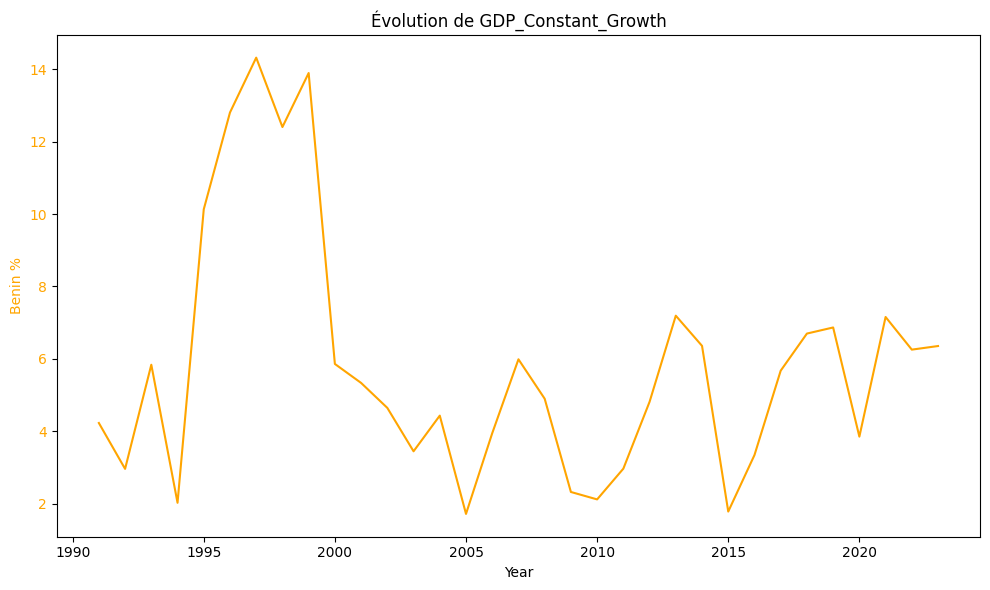

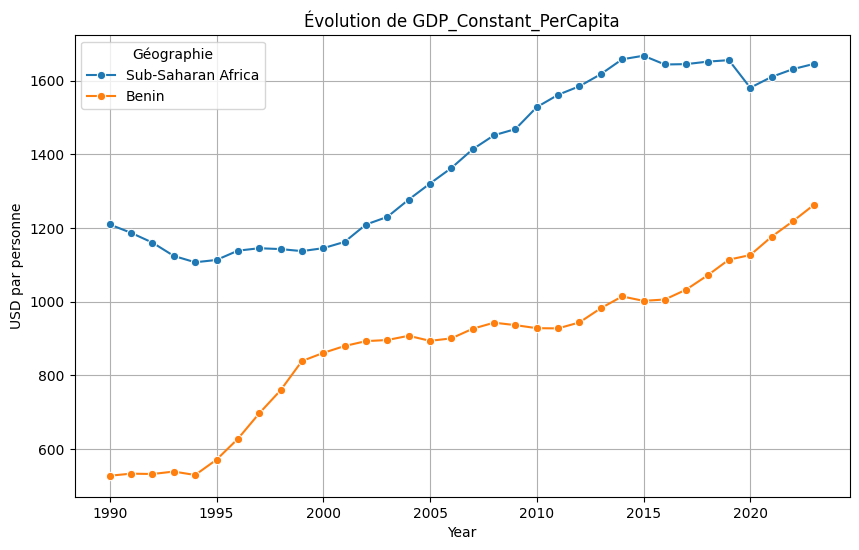

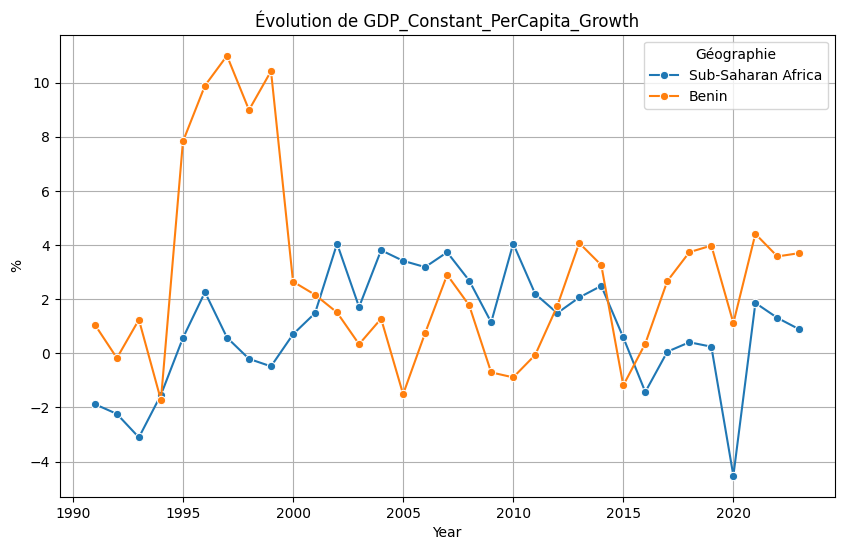

In [5]:
# 3. FDI
try:
    fdi_df = pd.read_csv('fdi_data.csv')
    fdi_df = fdi_df[fdi_df['Country'].isin(['Benin', 'Sub-Saharan Africa', 'Western Africa'])]
    fdi_df = fdi_df[fdi_df['Year'].between(1990, 2023)]
    
    for feature in ['FDI_Current', 'FDI_Percentage']:
        if feature in fdi_df.columns:
            fdi_df['Net_FDI'] = fdi_df.apply(lambda row: row['FDI_Current'] if row['Direction Label'] == 'Inward' else -row['FDI_Current'], axis=1)
            plot_dual_axis(
                fdi_df, feature, f'Évolution de {feature}', units.get(feature, feature),
                countries=['Benin', 'Sub-Saharan Africa', 'Western Africa'],
                save_path=f'graphs/fdi_{feature}.png'
            )
            plot_dual_axis(
                fdi_df, 'Net_FDI', 'Évolution de Net_FDI', 'Millions USD',
                countries=['Benin', 'Sub-Saharan Africa', 'Western Africa'],
                save_path=f'graphs/fdi_Net_FDI.png'
            )
    del fdi_df
except Exception as e:
    print(f"Erreur FDI : {str(e)}")

# 4. GDP
try:
    gdp_df = pd.read_csv('gdp_data.csv')
    gdp_df = gdp_df[gdp_df['Year'].between(1990, 2023)]
    
    for feature in ['GDP_Current', 'GDP_Current_PerCapita', 'GDP_Constant', 'GDP_Constant_PerCapita']:
        if feature in gdp_df.columns:
            gdp_df[f'{feature}_Growth'] = gdp_df.groupby('Country')[feature].pct_change() * 100
            if feature in dual_axis_features:
                plot_dual_axis(
                    gdp_df, feature, f'Évolution de {feature}', units.get(feature, feature),
                    save_path=f'graphs/gdp_{feature}.png'
                )
                plot_dual_axis(
                    gdp_df, f'{feature}_Growth', f'Évolution de {feature}_Growth', '%',
                    save_path=f'graphs/gdp_{feature}_Growth.png'
                )
            else:
                plot_single_axis(
                    gdp_df, feature, f'Évolution de {feature}', units.get(feature, feature),
                    save_path=f'graphs/gdp_{feature}.png'
                )
                plot_single_axis(
                    gdp_df, f'{feature}_Growth', f'Évolution de {feature}_Growth', '%',
                    save_path=f'graphs/gdp_{feature}_Growth.png'
                )
    del gdp_df
except Exception as e:
    print(f"Erreur GDP : {str(e)}")

# Croisements entre les données 

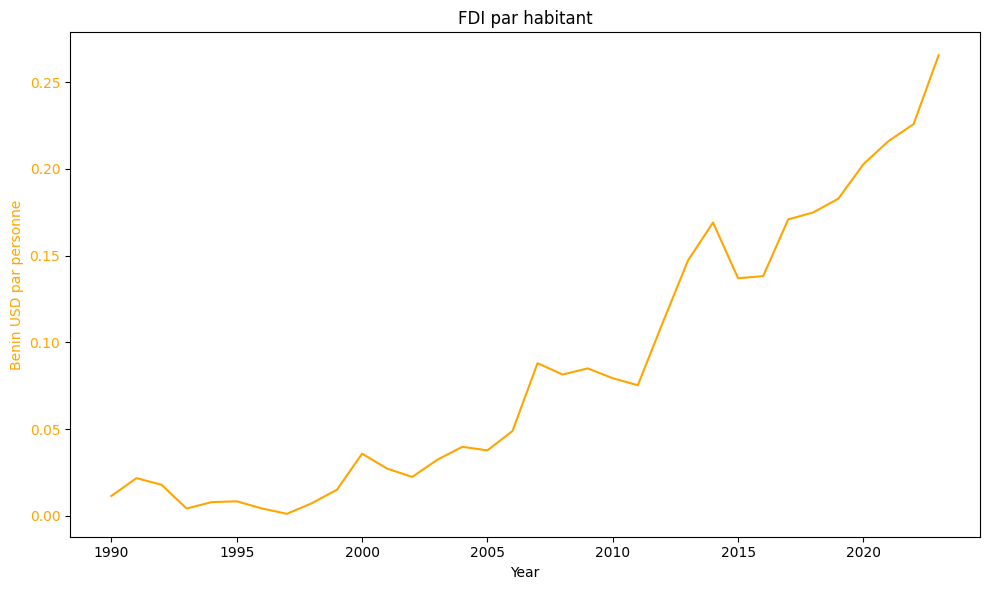

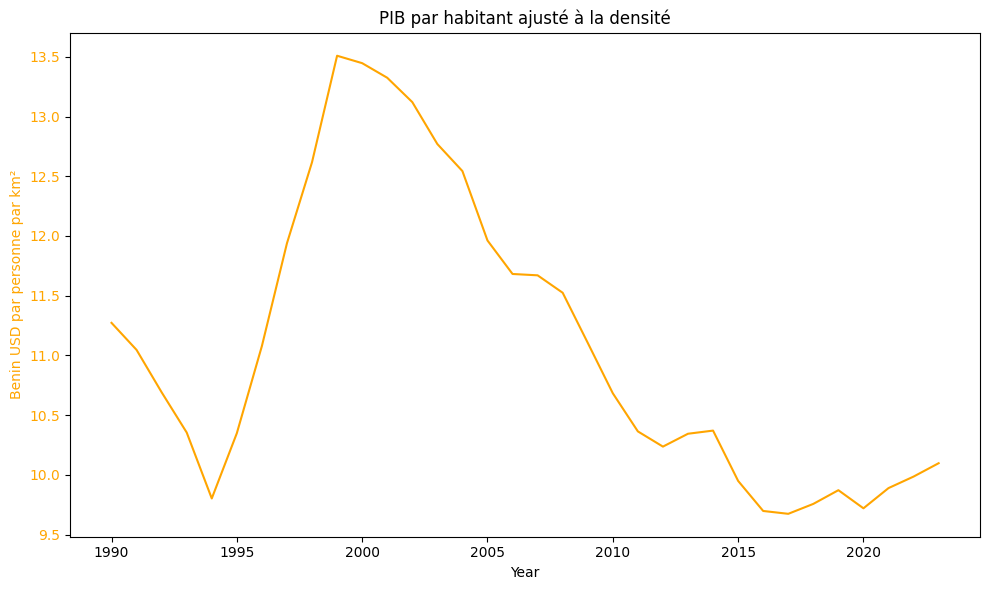

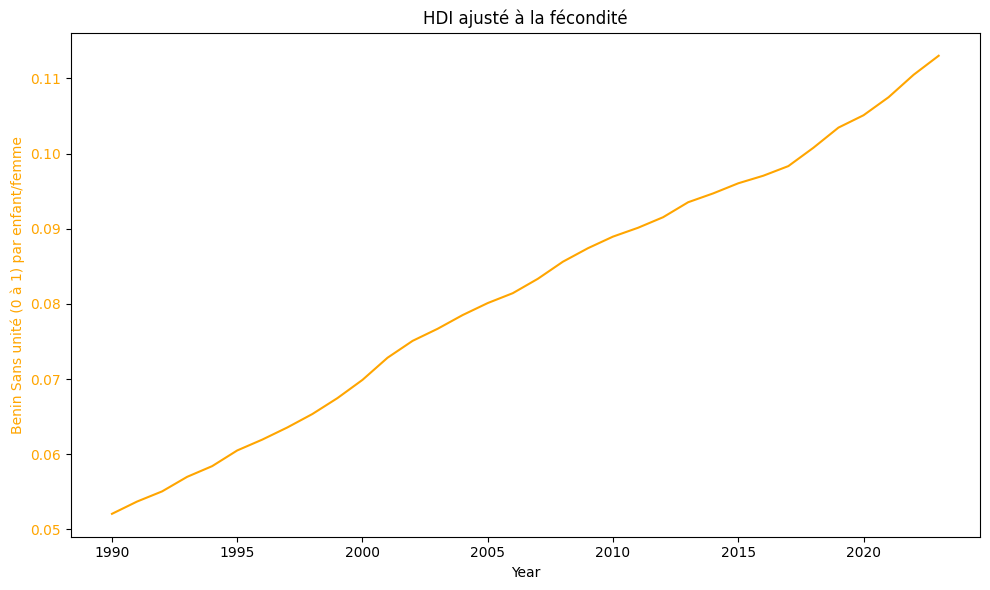

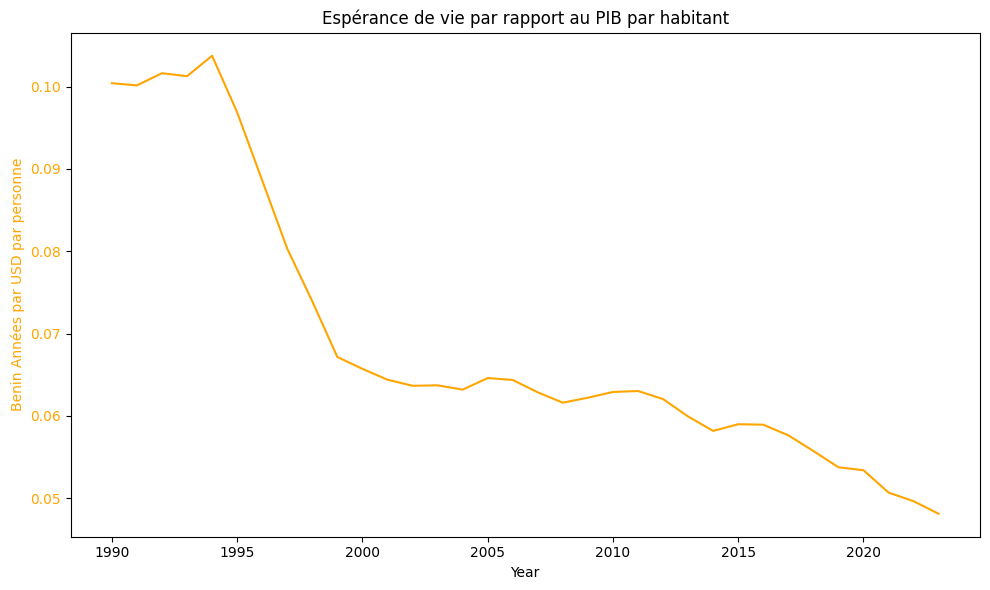

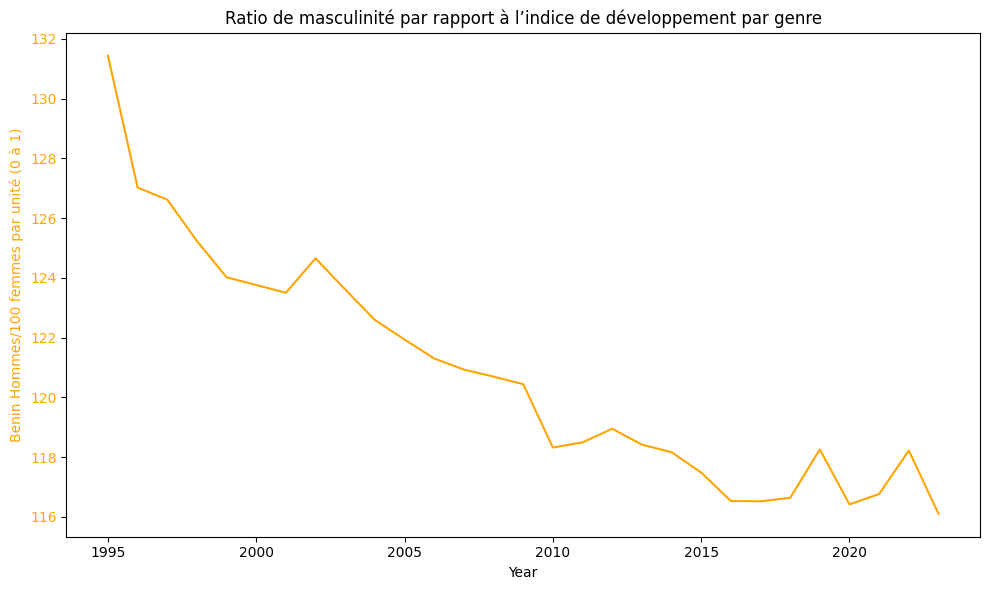

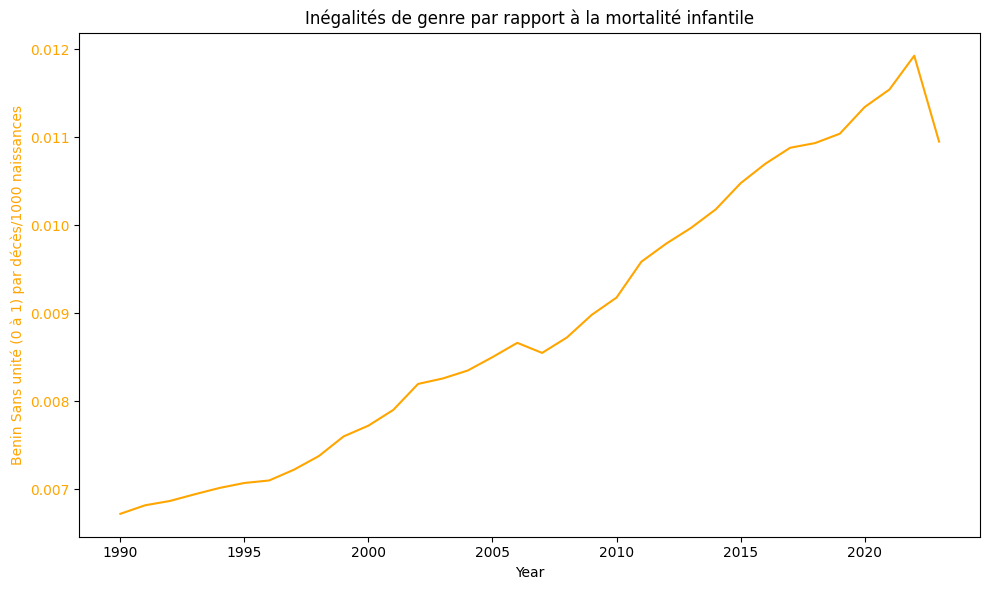

In [6]:


# 5. Croisements
try:
    # Préparer les données
    fdi_df = pd.read_csv('fdi_data.csv')
    fdi_df = fdi_df[fdi_df['Country'].isin(['Benin', 'Sub-Saharan Africa', 'Western Africa'])]
    fdi_df = fdi_df[fdi_df['Year'].between(1990, 2023)]
    fdi_agg = fdi_df.groupby(['Year', 'Country', 'Direction Label'])['FDI_Current'].sum().unstack()
    fdi_agg['FDI_Net'] = fdi_agg.get('Inward', 0) - fdi_agg.get('Outward', 0)
    fdi_agg = fdi_agg.reset_index()[['Year', 'Country', 'FDI_Net']]
    
    demo_df = pd.read_csv('demographic_data.csv').rename(columns={'Location': 'Country'})
    demo_df = demo_df[demo_df['Country'].isin(['Benin', 'Sub-Saharan Africa', 'Western Africa'])]
    demo_df = demo_df[demo_df['Year'].between(1990, 2023)]
    
    gdp_df = pd.read_csv('gdp_data.csv')
    gdp_df = gdp_df[gdp_df['Country'].isin(['Benin', 'Sub-Saharan Africa', 'Western Africa'])]
    gdp_df = gdp_df[gdp_df['Year'].between(1990, 2023)]
    
    social_df = pd.read_csv('social_data.csv').rename(columns={'country': 'Country'})
    social_df = social_df[social_df['Country'].isin(['Benin', 'Sub-Saharan Africa', 'Western Africa'])]
    social_melt = social_df[[col for col in social_df.columns if col.startswith('hdi_') or col.startswith('gdi_') or col.startswith('gii_') or col == 'Country']].melt(id_vars=['Country'], var_name='Year', value_name='value')
    social_melt['Indicator'] = social_melt['Year'].str.split('_').str[0]
    social_melt['Year'] = social_melt['Year'].str.extract('(\d+)').astype(float)
    social_melt = social_melt[social_melt['Year'].between(1990, 2023)].dropna(subset=['value'])
    social_melt = social_melt.pivot_table(index=['Year', 'Country'], columns='Indicator', values='value').reset_index()
    
    # Croisement 1 : FDI_Per_Person
    merged_fdi = pd.merge(fdi_agg, demo_df[['Year', 'Country', 'PopTotal']], on=['Year', 'Country'], how='inner')
    merged_fdi['FDI_Per_Person'] = merged_fdi['FDI_Net'] / merged_fdi['PopTotal']
    plot_dual_axis(
        merged_fdi, 'FDI_Per_Person', 'FDI par habitant', units.get('FDI_Per_Person', 'USD par personne'),
        countries=['Benin', 'Sub-Saharan Africa', 'Western Africa'],
        save_path='graphs/croisement_FDI_Per_Person.png'
    )
    
    # Croisement 2 : GDP_Per_Density
    merged_gdp = pd.merge(gdp_df[['Year', 'Country', 'GDP_Constant_PerCapita']], demo_df[['Year', 'Country', 'PopDensity']], on=['Year', 'Country'], how='inner')
    merged_gdp['GDP_Per_Density'] = merged_gdp['GDP_Constant_PerCapita'] / merged_gdp['PopDensity']
    plot_dual_axis(
        merged_gdp, 'GDP_Per_Density', 'PIB par habitant ajusté à la densité', units.get('GDP_Per_Density', 'USD par personne par km²'),
        countries=['Benin', 'Sub-Saharan Africa', 'Western Africa'],
        save_path='graphs/croisement_GDP_Per_Density.png'
    )
    
    # Croisement 3 : HDI_Per_TFR
    merged_hdi = pd.merge(social_melt[['Year', 'Country', 'hdi']], demo_df[['Year', 'Country', 'TFR']], on=['Year', 'Country'], how='inner')
    merged_hdi['HDI_Per_TFR'] = merged_hdi['hdi'] / merged_hdi['TFR']
    plot_dual_axis(
        merged_hdi, 'HDI_Per_TFR', 'HDI ajusté à la fécondité', units.get('HDI_Per_TFR', 'Sans unité (0 à 1) par enfant/femme'),
        countries=['Benin', 'Sub-Saharan Africa', 'Western Africa'],
        save_path='graphs/croisement_HDI_Per_TFR.png'
    )
    
    # Croisement 4 : LEx_et_GDP_Constant_PerCapita
    merged_lex = pd.merge(demo_df[['Year', 'Country', 'LEx']], gdp_df[['Year', 'Country', 'GDP_Constant_PerCapita']], on=['Year', 'Country'], how='inner')
    merged_lex['LEx_et_GDP_Constant_PerCapita'] = merged_lex['LEx'] / merged_lex['GDP_Constant_PerCapita']
    plot_dual_axis(
        merged_lex, 'LEx_et_GDP_Constant_PerCapita', 'Espérance de vie par rapport au PIB par habitant', units.get('LEx_et_GDP_Constant_PerCapita', 'Années par USD par personne'),
        countries=['Benin', 'Sub-Saharan Africa', 'Western Africa'],
        save_path='graphs/croisement_LEx_et_GDP_Constant_PerCapita.png'
    )
    
    # Croisement 5 : PopSexRatio_et_GDI
    merged_sexratio = pd.merge(demo_df[['Year', 'Country', 'PopSexRatio']], social_melt[['Year', 'Country', 'gdi']], on=['Year', 'Country'], how='inner')
    merged_sexratio['PopSexRatio_et_GDI'] = merged_sexratio['PopSexRatio'] / merged_sexratio['gdi']
    plot_dual_axis(
        merged_sexratio, 'PopSexRatio_et_GDI', 'Ratio de masculinité par rapport à l’indice de développement par genre', units.get('PopSexRatio_et_GDI', 'Hommes/100 femmes par unité (0 à 1)'),
        countries=['Benin', 'Sub-Saharan Africa', 'Western Africa'],
        save_path='graphs/croisement_PopSexRatio_et_GDI.png'
    )
    
    # Croisement 6 : GII_et_IMR
    merged_gii = pd.merge(social_melt[['Year', 'Country', 'gii']], demo_df[['Year', 'Country', 'IMR']], on=['Year', 'Country'], how='inner')
    merged_gii['GII_et_IMR'] = merged_gii['gii'] / merged_gii['IMR']
    plot_dual_axis(
        merged_gii, 'GII_et_IMR', 'Inégalités de genre par rapport à la mortalité infantile', units.get('GII_et_IMR', 'Sans unité (0 à 1) par décès/1000 naissances'),
        countries=['Benin', 'Sub-Saharan Africa', 'Western Africa'],
        save_path='graphs/croisement_GII_et_IMR.png'
    )
    
    # del fdi_df, demo_df, gdp_df, social_df, social_melt, merged_fdi, merged_gdp, merged_hdi, merged_lex, merged_sexratio, merged_gii
except Exception as e:
    print(f"Erreur croisement : {str(e)}")

# Notebook pour analyser les anomalies dans les datasets ANIP

Ce notebook identifie les anomalies dans les quatre fichiers CSV (`demographic_data.csv`, `social_data.csv`, `fdi_data.csv`, `gdp_data.csv`). Une anomalie est une valeur ou tendance inattendue, mais pas forcément fausse – elle peut refléter une réalité (ex. crise COVID). Une valeur fausse serait impossible (ex. population négative). Les méthodes utilisées sont fiables : stats descriptives (moyenne, min, max), Z-score pour outliers (>3 écarts-types), graphiques (lineplot pour tendances, boxplot pour négatifs/manquants). Période : 1990-2023. 

In [ ]:



import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

# Dossier pour graphiques
os.makedirs('anomalies_graphs', exist_ok=True)

# Fonction pour détecter anomalies et vérifier valeurs fausses
def detect_anomalies(df, feature, title, ylabel, save_path=None):
    # Stats descriptives
    stats = df.groupby('Country')[feature].describe()
    print(f"Stats pour {feature} :\\n", stats)

    # Vérification des valeurs fausses
    # Ex. négatif pour PopTotal, LEx > 100, IMR > 1000
    invalid_conditions = {
        'PopTotal': df[feature] < 0,
        'LEx': df[feature] > 100,
        'IMR': df[feature] > 1000,
        'Q5': df[feature] > 1000,
        'PopDensity': df[feature] < 0,
        'TFR': df[feature] < 0,
        'CBR': df[feature] < 0,
        'MedianAgePop': df[feature] < 0,
        'PopSexRatio': df[feature] < 0,
        'hdi': (df[feature] < 0) | (df[feature] > 1),
        'gdi': (df[feature] < 0) | (df[feature] > 1),
        'gii': (df[feature] < 0) | (df[feature] > 1),
        'gnipc': df[feature] < 0,
        'GDP_Current': df[feature] < 0,
        'GDP_Constant': df[feature] < 0,
        'GDP_Current_PerCapita': df[feature] < 0,
        'GDP_Constant_PerCapita': df[feature] < 0
    }
    if feature in invalid_conditions:
        invalid = df[invalid_conditions[feature]][['Year', 'Country', feature]]
        print(f"Valeurs potentiellement fausses pour {feature} :\\n", invalid if not invalid.empty else "Aucune")

    # Z-score pour outliers (anomalies si |Z| > 3)
    df['Z_score'] = (df[feature] - df[feature].mean()) / df[feature].std()
    outliers = df[df['Z_score'].abs() > 3]
    print(f"Outliers (Z-score >3) pour {feature} :\\n", outliers[['Year', 'Country', feature, 'Z_score']])

    # Graphique lineplot pour tendances et anomalies
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df, x='Year', y=feature, hue='Country', marker='o')
    plt.title(title)
    plt.ylabel(ylabel)
    plt.savefig(save_path)
    plt.close()

    # Boxplot pour négatifs/manquants
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='Country', y=feature)
    plt.title(f'Boxplot pour {feature}')
    plt.savefig(save_path.replace('.png', '_boxplot.png'))
    plt.close()

# 1. Démographie
demo_df = pd.read_csv('demographic_data.csv').rename(columns={'Location': 'Country'})
demo_df['Country'] = demo_df['Country'].replace('African Union: Western Africa', 'Western Africa')
demo_df = demo_df[demo_df['Year'].between(1990, 2023)]

for feature in ['PopTotal', 'PopDensity', 'PopSexRatio', 'MedianAgePop', 'CBR', 'TFR', 'LEx', 'IMR', 'Q5', 'NetMigrations']:
    if feature in demo_df.columns:
        detect_anomalies(demo_df, feature, f'Anomalies dans {feature}', feature, f'anomalies_graphs/demo_{feature}.png')


# 2. Social
social_df = pd.read_csv('social_data.csv').rename(columns={'country': 'Country'})
indicators = ['hdi', 'mys', 'gdi', 'gnipc', 'gii']
melted_dfs = []
for ind in indicators:
    cols = ['Country'] + [col for col in social_df.columns if col.startswith(ind + '_')]
    if not cols[1:]:
        continue
    df_ind = social_df[cols].melt(id_vars=['Country'], var_name='Year', value_name=ind)
    df_ind['Year'] = df_ind['Year'].str.extract('(\d+)').astype(float)
    df_ind = df_ind.dropna(subset=[ind])
    melted_dfs.append(df_ind)

social_long = melted_dfs[0]
for df in melted_dfs[1:]:
    social_long = pd.merge(social_long, df, on=['Country', 'Year'], how='outer')

social_long = social_long[social_long['Year'].between(1990, 2023)]

for feature in indicators:
    if feature in social_long.columns:
        detect_anomalies(social_long, feature, f'Anomalies dans {feature}', feature, f'anomalies_graphs/social_{feature}.png')


# 3. FDI
fdi_df = pd.read_csv('fdi_data.csv')
fdi_df = fdi_df[fdi_df['Country'].isin(['Benin', 'Sub-Saharan Africa', 'Western Africa'])]
fdi_df = fdi_df[fdi_df['Year'].between(1990, 2023)]

for feature in ['FDI_Current', 'FDI_Percentage']:
    if feature in fdi_df.columns:
        detect_anomalies(fdi_df, feature, f'Anomalies dans {feature}', feature, f'anomalies_graphs/fdi_{feature}.png')


# 4. GDP
gdp_df = pd.read_csv('gdp_data.csv')
gdp_df = gdp_df[gdp_df['Year'].between(1990, 2023)]

for feature in ['GDP_Current', 'GDP_Current_PerCapita', 'GDP_Constant', 'GDP_Constant_PerCapita']:
    if feature in gdp_df.columns:
        detect_anomalies(gdp_df, feature, f'Anomalies dans {feature}', feature, f'anomalies_graphs/gdp_{feature}.png')


# 5. Croisements (analyse des anomalies)
# Croisement 1 : FDI_Per_Person
fdi_agg = fdi_df.groupby(['Year', 'Country', 'Direction Label'])['FDI_Current'].sum().unstack()
fdi_agg['FDI_Net'] = fdi_agg.get('Inward', 0) - fdi_agg.get('Outward', 0)
fdi_agg = fdi_agg.reset_index()[['Year', 'Country', 'FDI_Net']]
merged_fdi = pd.merge(fdi_agg, demo_df[['Year', 'Country', 'PopTotal']], on=['Year', 'Country'], how='inner')
merged_fdi['FDI_Per_Person'] = merged_fdi['FDI_Net'] / merged_fdi['PopTotal']
detect_anomalies(merged_fdi, 'FDI_Per_Person', 'Anomalies dans FDI_Per_Person', 'USD par personne', 'anomalies_graphs/croisement_FDI_Per_Person.png')

# Croisement 2 : GDP_Per_Density
merged_gdp = pd.merge(gdp_df[['Year', 'Country', 'GDP_Constant_PerCapita']], demo_df[['Year', 'Country', 'PopDensity']], on=['Year', 'Country'], how='inner')
merged_gdp['GDP_Per_Density'] = merged_gdp['GDP_Constant_PerCapita'] / merged_gdp['PopDensity']
detect_anomalies(merged_gdp, 'GDP_Per_Density', 'Anomalies dans GDP_Per_Density', 'USD par personne par km²', 'anomalies_graphs/croisement_GDP_Per_Density.png')

# Croisement 3 : HDI_Per_TFR
merged_hdi = pd.merge(social_melt[['Year', 'Country', 'hdi']], demo_df[['Year', 'Country', 'TFR']], on=['Year', 'Country'], how='inner')
merged_hdi['HDI_Per_TFR'] = merged_hdi['hdi'] / merged_hdi['TFR']
detect_anomalies(merged_hdi, 'HDI_Per_TFR', 'Anomalies dans HDI_Per_TFR', 'Sans unité par enfant/femme', 'anomalies_graphs/croisement_HDI_Per_TFR.png')

# Croisement 4 : LEx_vs_GDP_Constant_PerCapita
merged_lex = pd.merge(demo_df[['Year', 'Country', 'LEx']], gdp_df[['Year', 'Country', 'GDP_Constant_PerCapita']], on=['Year', 'Country'], how='inner')
merged_lex['LEx_vs_GDP_Constant_PerCapita'] = merged_lex['LEx'] / merged_lex['GDP_Constant_PerCapita']
detect_anomalies(merged_lex, 'LEx_vs_GDP_Constant_PerCapita', 'Anomalies dans LEx_vs_GDP_Constant_PerCapita', 'Années par USD par personne', 'anomalies_graphs/croisement_LEx_vs_GDP_Constant_PerCapita.png')

# Croissement 5 : PopSexRatio_vs_GDI
merged_sexratio = pd.merge(demo_df[['Year', 'Country', 'PopSexRatio']], social_melt[['Year', 'Country', 'gdi']], on=['Year', 'Country'], how='inner')
merged_sexratio['PopSexRatio_vs_GDI'] = merged_sexratio['PopSexRatio'] / merged_sexratio['gdi']
detect_anomalies(merged_sexratio, 'PopSexRatio_vs_GDI', 'Anomalies dans PopSexRatio_vs_GDI', 'Hommes/100 femmes par unité', 'anomalies_graphs/croisement_PopSexRatio_vs_GDI.png')

# Croissement 6 : GII_vs_IMR
merged_gii = pd.merge(social_melt[['Year', 'Country', 'gii']], demo_df[['Year', 'Country', 'IMR']], on=['Year', 'Country'], how='inner')
merged_gii['GII_vs_IMR'] = merged_gii['gii'] / merged_gii['IMR']
detect_anomalies(merged_gii, 'GII_vs_IMR', 'Anomalies dans GII_vs_IMR', 'Sans unité par décès/1000 naissances', 'anomalies_graphs/croisement_GII_vs_IMR.png')

del fdi_df, demo_df, gdp_df, social_df, social_melt, merged_fdi, merged_gdp, merged_hdi, merged_lex, merged_sexratio, merged_gii

Stats pour PopTotal :\n                 count           mean           std         min           25%  \
Country                                                                        
Benin            34.0    9150.763206   2683.108112    5281.479    6842.82125   
Western Africa   34.0  297087.554882  79126.739858  183589.023  228865.08875   

                        50%           75%         max  
Country                                                
Benin             8823.6055   11278.01175   14111.034  
Western Africa  287701.5375  361126.19600  441016.755  
Valeurs potentiellement fausses pour PopTotal :\n Aucune
Outliers (Z-score >3) pour PopTotal :\n Empty DataFrame
Columns: [Year, Country, PopTotal, Z_score]
Index: []
Stats pour PopDensity :\n                 count       mean        std      min        25%      50%  \
Country                                                                    
Benin            34.0  81.152571  23.794864  46.8382  60.684850  78.2512   
Western Af